# Desafio 3

Neste desafio, iremos praticar nossos conhecimentos sobre distribuições de probabilidade. Para isso,
dividiremos este desafio em duas partes:
    
1. A primeira parte contará com 3 questões sobre um *data set* artificial com dados de uma amostra normal e
    uma binomial.
2. A segunda parte será sobre a análise da distribuição de uma variável do _data set_ [Pulsar Star](https://archive.ics.uci.edu/ml/datasets/HTRU2), contendo 2 questões.

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF

In [2]:
#%matplotlib inline

#from IPython.core.pylabtools import figsize


#figsize(12, 8)

#sns.set()

## Parte 1

### _Setup_ da parte 1

In [44]:
np.random.seed(42)
    
dataframe = pd.DataFrame({"normal": sct.norm.rvs(20, 4, size=10000),
                    "binomial": sct.binom.rvs(100, 0.2, size=10000)})
dataframe

,normal,binomial
0,21.986857,18
1,19.446943,15
2,22.590754,14
3,26.092119,15
4,19.063387,21
...,...,...
9995,25.204408,22
9996,12.006620,24
9997,17.178733,17
9998,21.983062,23


## Inicie sua análise a partir da parte 1 a partir daqui

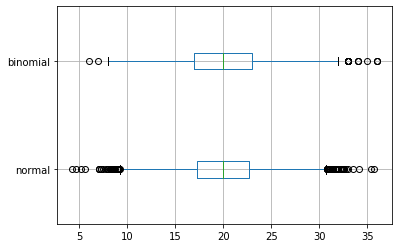

In [56]:
#Análise inicial do comportamento das variáveis por boxplot e histogram :) 

dataframe.boxplot(vert=False, grid=True )

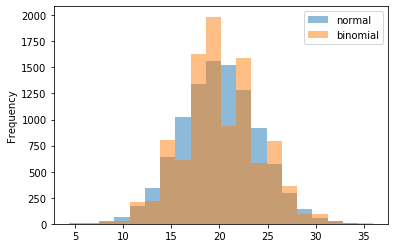

In [61]:
dataframe.plot.hist(alpha = 0.5, bins = 20)

## Questão 1

Qual a diferença entre os quartis (Q1, Q2 e Q3) das variáveis `normal` e `binomial` de `dataframe`? Responda como uma tupla de três elementos arredondados para três casas decimais.

Em outra palavras, sejam `q1_norm`, `q2_norm` e `q3_norm` os quantis da variável `normal` e `q1_binom`, `q2_binom` e `q3_binom` os quantis da variável `binom`, qual a diferença `(q1_norm - q1 binom, q2_norm - q2_binom, q3_norm - q3_binom)`?

In [63]:
def q1():
    # Retorne aqui o resultado da questão 1.
    
    #Seleciona apenas as linhas the interesse
    quantile = dataframe.describe().loc[['25%', '50%', '75%']]
    
    #Subtraindo as colunas para cada quantil
    sub = quantile['normal'] - quantile['binomial']
    
    return tuple(round(sub, 3))

In [64]:
q1()

(0.31, -0.01, -0.316)

Para refletir:

* Você esperava valores dessa magnitude?

* Você é capaz de explicar como distribuições aparentemente tão diferentes (discreta e contínua, por exemplo) conseguem dar esses valores?

> A resposta está neste lindo corolário! Forneça um *n* grande o suficiente (*n*>20), e **N(μ,σ)** será uma a boa aproximação para **B(n,p)**, sendo **μ = np** e **σ^2 = np (1 – p)**.

## Questão 2

Considere o intervalo $[\bar{x} - s, \bar{x} + s]$, onde $\bar{x}$ é a média amostral e $s$ é o desvio padrão. Qual a probabilidade nesse intervalo, calculada pela função de distribuição acumulada empírica (CDF empírica) da variável `normal`? Responda como uma único escalar arredondado para três casas decimais.

In [65]:
def q2():
    # Retorne aqui o resultado da questão 2.
    
    #Calcula função de distribuição acumulada empírica
    ecdf = ECDF(dataframe['normal'])
    
    #Intervalo entre cada ecdf
    ecdf_interval = ecdf(dataframe['normal'].mean() + dataframe['normal'].std()) - ecdf(dataframe['normal'].mean() - dataframe['normal'].std())
    
    return round(ecdf_interval, 3)

In [66]:
q2()

0.684

Para refletir:

* Esse valor se aproxima do esperado teórico?

> Sim! A probabilidade teórica neste intervalo $[\bar{x} - s, \bar{x} + s]$ é 0.68, enquanto para $[\bar{x} - 2s, \bar{x} + 2s]$ fica 0.95 e para $[\bar{x} - 3s, \bar{x} + 3s]$, 0.975.

* Experimente também para os intervalos $[\bar{x} - 2s, \bar{x} + 2s]$ e $[\bar{x} - 3s, \bar{x} + 3s]$.

## Questão 3

Qual é a diferença entre as médias e as variâncias das variáveis `binomial` e `normal`? Responda como uma tupla de dois elementos arredondados para três casas decimais.

Em outras palavras, sejam `m_binom` e `v_binom` a média e a variância da variável `binomial`, e `m_norm` e `v_norm` a média e a variância da variável `normal`. Quais as diferenças `(m_binom - m_norm, v_binom - v_norm)`?

In [67]:
def q3():
    # Retorne aqui o resultado da questão 3.
    
    #Diferença entre as médias e variâncias de cada coluna
    return (round(dataframe.binomial.mean() - dataframe.normal.mean(), 3), round(dataframe.binomial.var() - dataframe.normal.var(), 3))

In [68]:
q3()

(0.106, 0.22)

Para refletir:

* Você esperava valore dessa magnitude?
* Qual o efeito de aumentar ou diminuir $n$ (atualmente 100) na distribuição da variável `binomial`?
> Alterar o $n$ (número de tentativas) também alterará a média e a variância. Teoricamente, vemos que média($μ$) e $n$ são diretamente proporcinais por $μ = np$. Computacionalmente ocorre o MESMO resultado, reduzindo o $n$ também reduzimos μ e vice-versa (para o mesmo valor de $p$).

## Parte 2

### _Setup_ da parte 2

In [2]:
stars = pd.read_csv("pulsar_stars.csv")

stars.rename({old_name: new_name
              for (old_name, new_name)
              in zip(stars.columns,
                     ["mean_profile", "sd_profile", "kurt_profile", "skew_profile", "mean_curve", "sd_curve", "kurt_curve", "skew_curve", "target"])
             },
             axis=1, inplace=True)

stars.loc[:, "target"] = stars.target.astype(bool)

## Inicie sua análise da parte 2 a partir daqui

In [80]:
stars.tail()

,mean_profile,sd_profile,kurt_profile,skew_profile,mean_curve,sd_curve,kurt_curve,skew_curve,target
17892,136.429688,59.847421,-0.187846,-0.738123,1.296823,12.166062,15.450260,285.931022,False
17893,122.554688,49.485605,0.127978,0.323061,16.409699,44.626893,2.945244,8.297092,False
17894,119.335938,59.935939,0.159363,-0.743025,21.430602,58.872000,2.499517,4.595173,False
17895,114.507812,53.902400,0.201161,-0.024789,1.946488,13.381731,10.007967,134.238910,False
17896,57.062500,85.797340,1.406391,0.089520,188.306020,64.712562,-1.597527,1.429475,False


In [29]:
stars.shape

(17897, 9)

In [70]:
def preprocess(stars):
    
    #Seleciona apenas a média onde a estrela não é pulsar
    false_pulsar_mean_profile = stars.query('target == 0')['mean_profile']
    
    #Aplica a fórmula do z score
    false_pulsar_mean_profile_standardized = (false_pulsar_mean_profile - false_pulsar_mean_profile.mean())/false_pulsar_mean_profile.std()
    
    return false_pulsar_mean_profile_standardized

## Questão 4

Considerando a variável `mean_profile` de `stars`:

1. Filtre apenas os valores de `mean_profile` onde `target == 0` (ou seja, onde a estrela não é um pulsar).
2. Padronize a variável `mean_profile` filtrada anteriormente para ter média 0 e variância 1.

Chamaremos a variável resultante de `false_pulsar_mean_profile_standardized`.

Encontre os quantis teóricos para uma distribuição normal de média 0 e variância 1 para 0.80, 0.90 e 0.95 através da função `norm.ppf()` disponível em `scipy.stats`.

Quais as probabilidade associadas a esses quantis utilizando a CDF empírica da variável `false_pulsar_mean_profile_standardized`? Responda como uma tupla de três elementos arredondados para três casas decimais.

In [78]:
def q4():
    # Retorne aqui o resultado da questão 4.
    
    #Cria percent point function(ppf) com o array de probabilidades
    ppf = sct.norm.ppf([0.8, 0.9, 0.95], loc=0, scale=1)
    
    #Aplica função ECDF na variável
    ecdf = ECDF(preprocess(stars))
    
    #Aplica ecdf sobre o array de quantils
    cdf_values = ecdf(ppf)
    
    return tuple(np.around(cdf_values, decimals = 3))

In [79]:
q4()

(0.806, 0.911, 0.959)

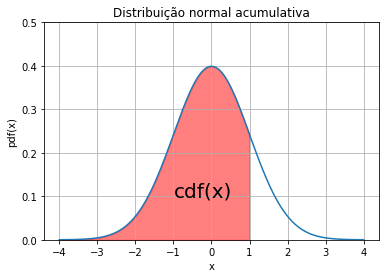

In [82]:
#Para melhor entendimento aqui está um exemplo gráfico de 
#distribuição normal acumulativa

fig, ax = plt.subplots()

x= np.arange(-4,4,0.001)
ax.plot(x, sct.norm.pdf(x))
ax.set_title("Distribuição normal acumulativa")
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.grid(True)

#Intervalo
px = np.arange(-4,1,0.01)
ax.set_ylim(0,0.5)
ax.fill_between(px, sct.norm.pdf(px), alpha=0.5, color='r')

ax.text(-1,0.1,"cdf(x)", fontsize=20)
plt.show()

Para refletir:

* Considerações importantes: 
 > 1. ppf: quantil correspondente a probabilidade inferior a cauda q.
 > 2. ecdf: probabilidade acumulada até determinado valor de observação.
 > 3. fórmula: `z = (x – μ) / σ`

* Os valores encontrados fazem sentido?
* O que isso pode dizer sobre a distribuição da variável `false_pulsar_mean_profile_standardized`?

## Questão 5

Qual a diferença entre os quantis Q1, Q2 e Q3 de `false_pulsar_mean_profile_standardized` e os mesmos quantis teóricos de uma distribuição normal de média 0 e variância 1? Responda como uma tupla de três elementos arredondados para três casas decimais.

In [83]:
def q5():
    # Retorne aqui o resultado da questão 5.
    
    #Calcula o quantil associado a cada valor de probabilidade
    (q1, q2, q3) = np.quantile(preprocess(stars), [.25, .50, .75])
    
    #Calcula o quantil associado a cada valor de probabilidade em uma distribuição normal(DN)
    (q1_normal, q2_normal, q3_normal) = sct.norm.ppf([0.25, 0.5, 0.75], 
                                                     loc=0, scale=1)
    
    #Diferença entre os valores de quantil (variável - DN)
    t = tuple(map(lambda i, j: i - j, (q1, q2, q3), (q1_normal, q2_normal, q3_normal)))
    
    return tuple([round(x,3) for x in t])

In [84]:
q5()

(0.027, 0.04, -0.004)

Para refletir:

* Os valores encontrados fazem sentido?
* O que isso pode dizer sobre a distribuição da variável `false_pulsar_mean_profile_standardized`?
* Curiosidade: alguns testes de hipóteses sobre normalidade dos dados utilizam essa mesma abordagem.